# Temas Tratados en el Trabajo Práctico 7

* Teoría de utilidad.

* Toma de decisiones basadas en utilidad.

* Valor de la información.

* Ganancia y entropía.

* Algoritmos basados en la teoría de la decisión.

* Sistemas expertos.


# Ejercicios Teóricos

## ¿Qué representa una función de utilidad?


Una función de utilidad es una representación numérica de las preferencias de un agente. Asigna una cantidad numérica para expresar cuán deseable es un estado del mundo para un agente y toma decisiones con cierta incertidumbre.

La elección preferida, según la teoría, será aquella cuya utilidad esperada sea la más alta; es decir, será aquella cuya utilidad que, estando ponderada por su probabilidad, sigue siento mayor que el resto. 

Esto quiere decir que una elección no se toma en base a su esperanza (promedio probabilístico) sino en base a su **utilidad** para el agente.

## Respondan las siguientes preguntas. Cada respuesta corresponde a un axioma de la utilidad, indique cuál se relaciona con cada pregunta y dé una breve explicación de lo que dice el axioma.

### ¿Qué color prefieren?

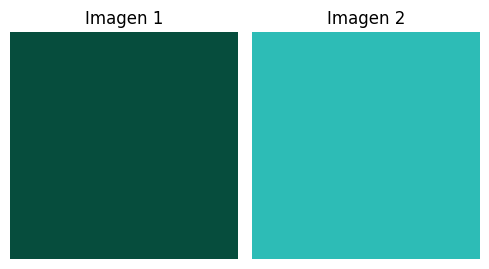

In [6]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

IMG_DIR = Path('fotos')  # usamos copias locales para evitar descargas

try:
    RESAMPLE = Image.Resampling.LANCZOS
except AttributeError:  # compatibilidad con versiones viejas de Pillow
    RESAMPLE = Image.LANCZOS

def load_and_resize(filename, size=(150, 150)):
    img = Image.open(IMG_DIR / filename)
    return img.resize(size, RESAMPLE)

img1 = load_and_resize('AgenteRojo1.png')
img2 = load_and_resize('AgenteRojo2.png')

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title('Color 1')

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('Color 2')

plt.tight_layout()
plt.show()


Prefiero el color de la imagen 2.

- __Axioma de ordenacion:__


Este axioma establece que un agente racional puede comparar y ordenar cualquier par de resultados posibles. Esto significa que, si se le presentan dos opciones, el agente puede decidir si prefiere una sobre la otra o si le son indiferentes.

### Entre sacar un 10 o un 7 en un parcial, ¿qué prefieren? ¿Y entre el 7 y desaprobar?

Entre sacar 10 o un 7, prefiero un 10, mientras que entre el 7 o desaprobar prefiero el 7.

- __Axioma de transitividad:__

Este axioma establece que las preferencias de un agente son consistentes. En otras palabras, si un agente prefiere una opción A sobre una opción B, y la opción B sobre una opción C, entonces el agente debe preferir la opción A sobre la C.

### Imagínense que hacen una apuesta de $100 jugando al cara o cruz, si pudieran trucar la moneda para que ustedes ganaran un porcentaje *p* de las veces, ¿en qué valor configurarían *p*?

Configuraria p en el 100% de su valor

- __Axioma de monoticidad:__

Este axioma establece que, si una lotería (o apuesta) tiene un resultado más deseable que otra, un agente racional preferirá aquella que le dé la mayor probabilidad de conseguir ese resultado más deseable. 

### En una feria hay dos juegos: uno en el que el premio son $100 y otro en el que el premio es una piedra, ambos con una probabilidad *p* de ganar al juego. ¿A qué juego prefieren jugar?

Prefiero jugar el juego cuyo premio son $100.

- __Axioma de monoticidad:__

Este axioma establece que, si dos loterías tienen los mismos posibles resultados, un agente racional preferirá aquella que le otorgue la mayor probabilidad de conseguir el resultado más deseable. De manera inversa, si dos loterías tienen la misma probabilidad de éxito, el agente preferirá la que ofrezca un resultado más deseable.

### En un casino hay dos juegos y en ambos el premio son $1000. El primer juego se gana cuando se tira una moneda y sale cara y el segundo juego se gana cuando sale 6 en un dado. ¿A qué juego prefieren jugar?

Preferiria jugar el juego de la moneda ya que tiene mayor probabilidad.

- __Axioma de monoticidad:__

Este axioma establece que, si dos loterías tienen los mismos posibles resultados, un agente racional preferirá aquella que le otorgue la mayor probabilidad de conseguir el resultado más deseable. De manera inversa, si dos loterías tienen la misma probabilidad de éxito, el agente preferirá la que ofrezca un resultado más deseable.

### Supongamos que quiere postularse a una beca. Primero, existe un 60% de probabilidad de que le llamen para una entrevista. Si no le llaman, entonces hay un 20% de probabilidad de que le ofrezcan participar en un curso online ¿Cuál es la probabilidad total de cada evento (recibir la beca, recibir el curso o no recibir nada)?

Probabilidad de recibir la beca: $60\%$.

Probabilidad de recibir el curso: $(1 - 0.6) \times 0.2 \times 100 = 8\%$.

Probabilidad de no recibir nada: $(1 - 0.6) \times (1 - 0.2) \times 100 = 32\%$.


## Los boletos de una lotería cuestan un dólar. Hay dos juegos posibles con distintos premios: uno de 10 dólares con una probabilidad de uno entre 50 y otro de 1.000.000 dólares con una probabilidad de uno entre 2.000.000.

### ¿Cuál es el valor monetario esperado del boleto de lotería?

Para hacer el análisis matemático, definimos las siguientes variables:

| Juego 1                          | Juego 2                                        |
| -------------------------------- | ---------------------------------------------- |
| $G_{1}=\$9$ ganancia del juego 1 | $G_{2}=\$1.999.999$ ganancia del juego 2       |
| $P_{1}=-\$1$ perdida del juego 1 | $P_{2}=-\$1$ perdida del juego 2               |
| $P(G_{1})=p=\tfrac{1}{50}$        | $P(G_{2})=q=\tfrac{1}{2.000.000}$               |
| $P(P_{1}) = 1-p = \tfrac{49}{50}$ | $P(P_{2}) = 1-q = \tfrac{1.999.999}{2.000.000}$ |

Y ahora analizamos el Valor Monetario Esperado __VME__:

$$
\begin{aligned}
  VME_1 &= \sum P(J_k) \cdot G_k = \tfrac{1}{50} \times 9 + \tfrac{49}{50} \times (-1) = -0.8 \\
  VME_2 &= \sum P(J_k) \cdot G_k = \tfrac{1}{2.000.000} \times 999.999 + \tfrac{1.999.999}{2.000.000} \times (-1) = -0.5\\
\end{aligned}
$$

Esto quiere decir que la gente que juega al primer juego __pierde, en promedio, $0,8__ y la gente que juega el segundo juego __pierde, en promedio, $0,5__.


### ¿Cuándo es razonable comprar un boleto?

Es razonable comprar un boleto cuando $VME>0$, caso contrario estaríamos perdiendo capital __en promedio__. 

Un $VME$ negativo me indica que el escenario es, en promedio, una pérdida de capital, incluso si existe la posibilidad de tener ganancias netas. Podría darse el caso de ganar el segundo juego luego de comprar 1 boleto, y gano $\$999.999 lo cuál es un $999.999\%$ de retorno de inversión. Pero eso es muy improbable, por lo que seguiría apostando y apostando hasta alcanzar el premio. Si siguiese apostando, llegaría a un punto donde he comprado $1 \ 000 \ 000$ de boletos y aún no gano; en este punto, ganar el juego solo me devuelve mis gastos, tengo ganancia neta nula. De seguir comprando, empezaría a perder capital, incluso si gano el juego. Es por ello que __en promedio__ el juego me dice que voy a perder.

En este caso, donde participar implica una pérdida unitaria, ganar implica una gancia $G$ y perder implica una pérdida unitaria, uno debería apostar cuando:

$$
\begin{aligned}
  VME &= p \cdot G - (1-p) > 0 \ \
  p &> \tfrac{1}{G+1} \iff   G > \tfrac{1-p}{p}\\
\end{aligned}
$$

En nuestro caso, podemos verlo de ambos lados:

| Juego | La probabilidad debe ser...                    | La ganancia debe ser...                   |
| ----- | ---------------------------------------------- | ----------------------------------------- |
| (1)   | $p > 10 \ \% \ , G_{1}=9$                      | $G_{1}=49, \ p=2 \%$                      |
| (2)   | $q > 1.0 \times 10^{-4} \ \%, \ G_{2}=999.999$ | $G_{2}=1.999.999, \ q=5.0 \times 10^{-5}$ |


## Hay que reparar una máquina averiada y el mecánico diagnostica que si la avería es leve la reparación costará \$300, pero si es grave costará \$1.200. La probabilidad de que la avería sea grave es 2/3. También se ofrece la alternativa de comprar una máquina usada por \$600. Qué decisión se tomará si:


### La función de utilidad fuese la mostrada por el agente rojo.

### La función de utilidad fuese la mostrada por el agente verde.


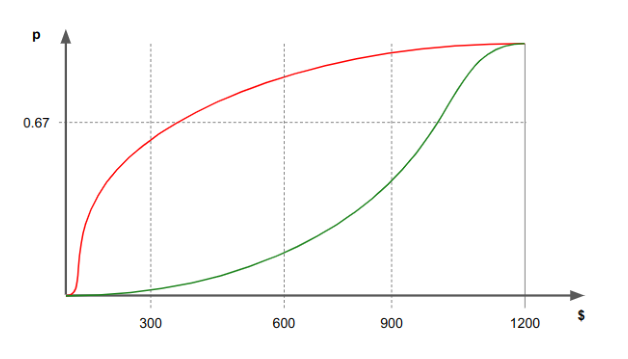

In [7]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

img_path = Path('Imagenes/TP7E5.jpg')
img = Image.open(img_path)

plt.figure(figsize=(img.width / 80, img.height / 80))
plt.imshow(img)
plt.axis('off')
plt.show()


Probabilidad de avería grave: 
$P(grave) = 0.667$
Probabilidad de avería leve: 
$P(leve) = 1 - P(grave) = 0.333$ 

En primer lugar calculamos el valor esperado del costo de arreglar la máquina:

$$
VE(arreglo) = P(grave) \times cost(grave) + P(leve) \times cost(leve)
$$

$$
VE(arreglo) = 0.667 \times 1200 + 0.333 \times 300 = 900
$$

Es decir que el precio que el agente debe estar dispuesto a gastar para arreglar la máquina es de $900.

1. Si la función de utilidad es la del agente rojo, vemos que para la probabilidad de avería grave (0.67), estaría dispuesto a gastar hasta aproximadamente $350. Es decir que el agente rojo no arriesgaría a arreglar la máquina bajo estas condiciones y directamente compraría la usada.

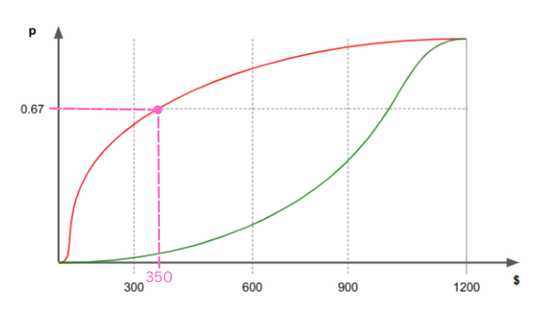

Visto de otra forma, para el valor esperado del arreglo de $900, el agente rojo ve una probabilidad de avería grave muy alta, de aproximadamente 90%, por lo que no arriesgaría a arreglarla.

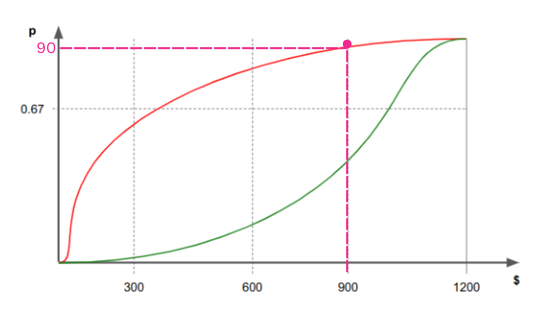

2. Si la función de utilidad es la del agente verde, para una probabilidad de 0.67, se arriesga a gastar hasta aproximadamente $1000, que es mayor al valor esperado del arreglo, por lo que decidiría arreglar la máquina. 

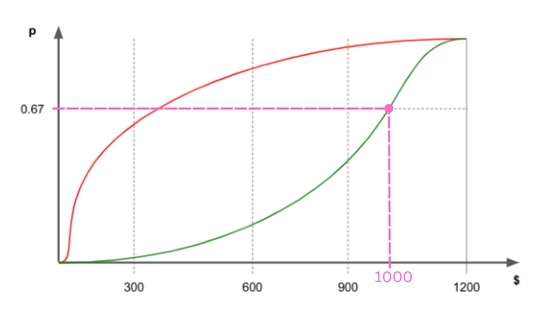

Del mismo modo, par el valor esperado de $900, el agente verde observa una probabilidad de avería grave de aproximadamete el 50%, por lo que no le importaría arriesgar a arreglar la máquina.

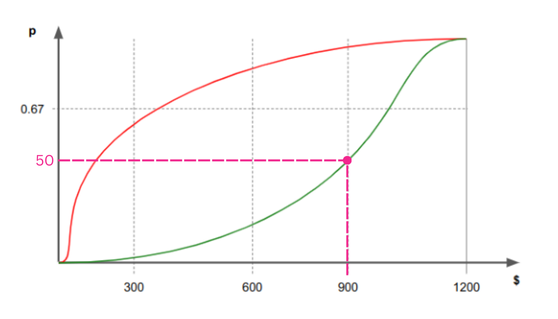

# Ejercicios de Implementación


### En unos laboratorios de un hospital se está investigando sobre una sustancia para la curación de una determinada enfermedad. Dicha sustancia ha sido inyectada en varias cobayas enfermas para verificar sus efectos. Los resultados de las pruebas realizadas se sintetizan en la tabla que se muestra a continuación. Determine las reglas que rigen las condiciones en las que se ha de administrar una sustancia e implemente un sistema experto en CLIPS que determine si un sujeto resultará curado o no.

| Estado de la enfermedad | Concentración de la sustancia | Número de dosis | Condición física | Efecto    |
|---|---:|---:|---|---|
| Incipiente | 75 | 70 | Fuerte | Curación |
| Incipiente | 80 | 90 | Fuerte | Defunción |
| Incipiente | 85 | 85 | Débil  | Defunción |
| Incipiente | 62 | 95 | Débil  | Defunción |
| Incipiente | 79 | 70 | Débil  | Curación |
| Avanzado   | 72 | 90 | Fuerte | Curación |
| Avanzado   | 83 | 78 | Débil  | Curación |
| Avanzado   | 64 | 66 | Fuerte | Curación |
| Avanzado   | 81 | 75 | Débil  | Curación |
| Terminal   | 71 | 80 | Fuerte | Defunción |
| Terminal   | 65 | 70 | Fuerte | Defunción |
| Terminal   | 75 | 80 | Débil  | Curación |
| Terminal   | 68 | 80 | Débil  | Curación |
| Terminal   | 70 | 96 | Débil  | Curación |




Utilizando la siguiente sustitución:

$$
\alpha = \frac{B}{B+M}
$$

Donde: 

- $\alpha \text{: Porcentaje utilizado en el calculo de la entropia}$
- $B \text{: Cantidad de casos "buenos" o positivos (Curación)}$
- $M \text{: Cantidad de casos "malos" o negativos (Defunción)}$


Y podemos calcular:

$$
E(\alpha) =  -\alpha \log _2 \left( \alpha \right) - (1-\alpha) \log _2 \left( 1 - \alpha \right)
$$

Con esto podemos armar las siguientes tablas:

Dale, te lo dejo masticado con la **entropía binaria** $H(\alpha)=-\alpha \log_2 \alpha - (1-\alpha)\log_2(1-\alpha)$ y las tablas que veníamos usando. Redondeo a **5 decimales**.

- __Distribución global (Efecto)__


| Clase     | Cuenta | Proporción $\alpha$ |
| --------- | -----: | -------------: |
| Curación  |      9 | 9/14 $\approx$ 0.64286 |
| Defunción |      5 | 5/14 $\approx$ 0.35714 |
| **Total** | **14** |              1 |

**Entropía global** $H(\text{Efecto})$ = **0.94029** bits.



- __Por Estado__

| Estado     |  C |  D | Total | $\alpha=\frac{B}{B+M}$ |      $H(\alpha)$ |
| ---------- | -: | -: | ----: | ----------------: | ----------: |
| Incipiente |  2 |  3 |     5 |           0.40000 | **0.97095** |
| Avanzado   |  4 |  0 |     4 |           1.00000 | **0.00000** |
| Terminal   |  3 |  2 |     5 |           0.60000 | **0.97095** |

Entropía condicional $H(\text{Efecto} \mid \text{Estado})$
\= $\frac{5}{14}\cdot 0.97095 + \frac{4}{14}\cdot 90 + \frac{5}{14}\cdot 0.97095$ = **0.69354** bits.


- __Terminal por Condición__

| Estado=Terminal | Condición |  C |  D | Total |     $\alpha$ |      $H(\alpha)$ |
| --------------- | --------- | -: | -: | ----: | ------: | ----------: |
| Terminal        | Fuerte    |  0 |  2 |     2 | 0.00000 | **0.00000** |
| Terminal        | Débil     |  3 |  0 |     3 | 1.00000 | **0.00000** |

Entropía del nodo padre (Terminal): **0.97095**.
Entropía ponderada tras el split: $\frac{2}{5}\cdot 0 + \frac{3}{5} \cdot 0 = 0$.


- __Incipiente por Dosis (cortes 70 y 85)__

| Estado=Incipiente | Rango Dosis |  C |  D | Total |     $\alpha$ |      $H(\alpha)$ |
| ----------------- | ----------- | -: | -: | ----: | ------: | ----------: |
| Incipiente        | $\leq$ 70        |  2 |  0 |     2 | 1.00000 | **0.00000** |
| Incipiente        | 71–84       |  0 |  0 |     0 |       — |           — |
| Incipiente        | $\geq$ 85        |  0 |  3 |     3 | 0.00000 | **0.00000** |

Entropía del nodo padre (Incipiente): **0.97095**.
Entropía ponderada tras el split: $\frac{2}{5}\cdot 0 + \frac{3}{5}\cdot 0 = 0$.


- __Avanzado__

| Estado=Avanzado |  C |  D | Total |     $\alpha$ |      $H(\alpha)$ |
| --------------- | -: | -: | ----: | ------: | ----------: |
| Avanzado        |  4 |  0 |     4 | 1.00000 | **0.00000** |


__Terminamos con el siguiente mapa:__


![alt text](Imagenes/TP7E5.jpg)

Luego, desarrollamos el código en CLIPS.

```lisp
; ================================
;  Sistema experto: Curación vs Defunción
;  Basado en tus reglas inducidas del set
;  Estados: incipiente / avanzado / terminal
;  Condición: fuerte / debil
; ================================

(clear)

; -------- Parámetros editables ----------
(defglobal
  ?*dose-low*  = 70       ; Incipiente: dosis <= low  -> curacion
  ?*dose-high* = 85       ; Incipiente: dosis >= high -> defuncion
  ?*default-efecto* = curacion)  ; clase por defecto (o no-estimable)

; -------- Estructuras de datos ----------
(deftemplate paciente
  (slot estado)          ; incipiente | avanzado | terminal
  (slot condicion)       ; fuerte | debil
  (slot concentracion)   ; numero (no usado en reglas actuales)
  (slot dosis))          ; numero

(deftemplate decision
  (slot efecto))         ; curacion | defuncion | no-estimable

; -------- Reglas específicas ----------
; Nota: (not (decision ...)) evita duplicados.
; Uso de salience: específicas > generales > default.

; Avanzado -> Curación
(defrule r-avanzado-curacion
  (declare (salience 80))
  (not (decision (efecto ?)))
  (paciente (estado avanzado))
  =>
  (assert (decision (efecto curacion))))

; Terminal & Fuerte -> Defunción
(defrule r-terminal-fuerte-defuncion
  (declare (salience 90))
  (not (decision (efecto ?)))
  (paciente (estado terminal) (condicion fuerte))
  =>
  (assert (decision (efecto defuncion))))

; Terminal & Débil -> Curación
(defrule r-terminal-debil-curacion
  (declare (salience 90))
  (not (decision (efecto ?)))
  (paciente (estado terminal) (condicion debil))
  =>
  (assert (decision (efecto curacion))))

; Incipiente & Dosis <= low -> Curación
(defrule r-incipiente-dosis-baja
  (declare (salience 100))
  (not (decision (efecto ?)))
  (paciente (estado incipiente) (dosis ?d))
  (test (<= ?d ?*dose-low*))
  =>
  (assert (decision (efecto curacion))))

; Incipiente & Dosis >= high -> Defunción
(defrule r-incipiente-dosis-alta
  (declare (salience 100))
  (not (decision (efecto ?)))
  (paciente (estado incipiente) (dosis ?d))
  (test (>= ?d ?*dose-high*))
  =>
  (assert (decision (efecto defuncion))))

; -------- Regla por defecto ----------
; Si ninguna específica disparó, aplica la clase mayoritaria (o lo que definas).
(defrule r-default
  (declare (salience -100))
  (not (decision (efecto ?)))
  (paciente)
  =>
  (assert (decision (efecto ?*default-efecto*))))

; -------- Utilidades (opcional: imprimir resultado) ----------
(defrule r-print
  ?d <- (decision (efecto ?e))
  =>
  (printout t ">> Efecto predicho: " ?e crlf))
```

- - -



# Anexo

## Funciones de Utilidad y Función de Certeza

El lote es tal que: premio de $10 con $p_1=\tfrac{1}{50}$ y premio de $\$1.000.000$ con $p_2=\tfrac{1}{2{,}000{,}000}$; el boleto cuesta $1. Trabajemos siempre con **resultados netos**:

| Juego 1    | Juego 2          |
| ---------- | ---------------- |
| $G_{1}=+9$ | $G_{2}=+999.999$ |
| $L_{1}=-1$ | $L_{2}=-1$       |


  No jugar = resultado 0.


### Utilidad clásica (von Neumann–Morgenstern)

La regla es “elegí si $EU(\text{jugar}) > EU(\text{no jugar})$”. Con una utilidad **CARA** (exponencial), muy usada porque depende del **incremento** y no del patrimonio inicial:

$$
U(x)= -e^{-a x}\quad (a\in\mathbb{R})
$$

* $a>0$: aversión al riesgo.
* $a=0$: riesgo neutral (límite $\Rightarrow$ $U(x)=x$).
* $a<0$: buscador de riesgo.

Para una lotería binaria $(p:\text{win};\,1-p:\text{loss})$:

$$
EU = p\,U(x_{\text{win}})+(1-p)\,U(x_{\text{loss}})
$$

Decidís jugar si $EU > U(0)=-1$. Mucho más cómodo usar el **equivalente de certeza**:

$$
\text{CE} = -\frac{1}{a}\ln\!\Big(p\,e^{-a x_{\text{win}}}+(1-p)\,e^{-a x_{\text{loss}}}\Big)
$$

Conviene jugar $\Leftrightarrow$ $\text{CE} > 0$ (porque “no jugar” vale 0).

Aplicado a tus juegos (dejando $a$ para que LO ELIJAS vos):

$$
\text{CE}_1(a)= -\frac{1}{a}\ln\!\Big(\tfrac{1}{50}e^{-9a}+\tfrac{49}{50}e^{a}\Big)
$$

$$
\text{CE}_2(a)= -\frac{1}{a}\ln\!\Big(\tfrac{1}{2\cdot10^6}e^{-999999a}+\Big(1-\tfrac{1}{2\cdot10^6}\Big)e^{a}\Big)
$$

* Si $a>0$ pequeño: ambos CE salen **negativos** $\Rightarrow$ no jugar.
* Si $a<0$ (gusto por riesgo): suele volverse **positivo** el del jackpot $\Rightarrow$ jugar el 2.

### Cómo **calibrar $a$** rápido

Pregúntate: “¿Entre un **p** de ganar $+b$ y $1-p$ de perder $c$, qué monto seguro $m$ me deja indiferente?” Resolvés:

$$
m = -\frac{1}{a}\ln\!\big(p\,e^{-ab}+(1-p)e^{ac}\big)\quad \Rightarrow\quad a
$$

Con un solo caso de indiferencia sacás un $a$ “tuyo”. Sin calibración, no hay veredicto único, solo la receta.



### B) Enfoque de **costos** (función de pérdida)

En teoría de decisión también se formula como “**minimizar costo esperado**”. Es **equivalente** a utilidad si ponés $U=-C$, pero a veces es cognitivamente más simple.

#### B1) Costo “contable” (riesgo neutral)

Definí $C(x)=-x$ sobre el resultado neto. Entonces:

$$
\mathbb{E}[C]= -\text{VME}
$$

* Juego 1: $\text{VME}=\tfrac{1}{50}(+9)+\tfrac{49}{50}(-1)=-0.8$ $\Rightarrow$ $\mathbb{E}[C]=+0.8$.
* Juego 2: $\text{VME}=\tfrac{1}{2\cdot10^6}(+999999)+\Big(1-\tfrac{1}{2\cdot10^6}\Big)(-1)=-0.5$ $\Rightarrow$ $\mathbb{E}[C]=+0.5$.
  Minimizar costo $\Rightarrow$ **no jugar** ninguno. Este es el veredicto frío, contable.

#### B2) Costo **riesgo-sensible**

Si querés penalizar más la pérdida que el promedio, usá costo exponencial (entropic risk):

$$
\text{Riesgo}_\theta \;=\; \frac{1}{\theta}\ln \big(\,p\,e^{\theta C_{\text{win}}}+(1-p)e^{\theta C_{\text{loss}}}\,\big)
$$

* $\theta>0$: muy averso; sube el “precio” de la cola mala.
* $\theta<0$: buscador; abarata la pérdida.
  Con $C=-x$, minimizás ese riesgo. Es el análogo en “mundo costos” de la utilidad exponencial.


### Qué expresa cada modelo

* **Utilidad clásica** con $a<0$ captura “la gente sobrevalora el premio grande” vía **gusto por riesgo**: un $-a$ más grande hace que el término $e^{-a x_{\text{win}}}$ pese muchísimo.
* **Costos** B1 dice lo que manda el contador: ambos pierden en promedio.
* **Costos** B2 te deja codificar “el dolor de perder 1 es chico comparado con la chance del premio enorme” con $\theta<0$.


## Solución alternativa al ejercicio 5

Primero, __separamos la información__ en diferentes tablas para tratar de encontrar patrones.

#### Tabla 1. Frecuencia por estado

| Estado     | Curación | Defunción |  Total |
| ---------- | -------: | --------: | -----: |
| Incipiente |        2 |         3 |      5 |
| Avanzado   |        4 |         0 |      4 |
| Terminal   |        3 |         2 |      5 |
| **Total**  |    **9** |     **5** | **14** |


#### Tabla 2. Terminal por condición

| Estado=Terminal | Condición | Curación | Defunción | Regla propuesta                   |
| --------------- | --------- | -------: | --------: | --------------------------------- |
| Terminal        | Fuerte    |        0 |         2 | Terminal $\land$ Fuerte $\to$ **Defunción** |
| Terminal        | Débil     |        3 |         0 | Terminal $\land$ Débil  $\to$ **Curación**  |


#### Tabla 3. Incipiente por dosis

| Estado=Incipiente | Rango Dosis | Curación | Defunción | Regla propuesta                         | Nota                   |
| ----------------- | ----------- | -------: | --------: | --------------------------------------- | ---------------------- |
| Incipiente        | $\leq$ 70        |        2 |         0 | Incipiente $\land$ Dosis $\leq$ 70 $\to$ **Curación**  | coincide con dos filas |
| Incipiente        | 71–84       |        0 |         0 | **No estimable**                        | sin datos              |
| Incipiente        | $\geq$ 85        |        0 |         3 | Incipiente $\land$ Dosis $\geq$ 85 $\to$ **Defunción** | tres casos             |


#### Tabla 4. Avanzado

| Estado=Avanzado | Condición    | Curación | Defunción | Regla propuesta         |
| --------------- | ------------ | -------: | --------: | ----------------------- |
| Avanzado        | (cualquiera) |        4 |         0 | **Avanzado $\to$ Curación** |


#### Tabla 5. Reglas finales

| ID | Regla                   | Predicción   | Aciertos/Total |
| -: | ----------------------- | ------------ | -------------: |
| R1 | Avanzado                | Curación     |            4/4 |
| R2 | Terminal $\land$ Fuerte       | Defunción    |            2/2 |
| R3 | Terminal $\land$ Débil        | Curación     |            3/3 |
| R4 | Incipiente $\land$ Dosis $\leq$ 70 | Curación     |            2/2 |
| R5 | Incipiente $\land$ Dosis $\geq$ 85 | Defunción    |            3/3 |
| R6 | Else                    | No estimable |              — |



# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)